   Hypothesis: The ratio of men biking in nighttime (7:00pm-5:00am) versus 
   daytime(5:00am-7:00pm) 
   is higher than the ratio of women biking in nighttime versus daytime
   
   Null hypothesis: There is no difference in the ratio of men biking in nighttime (7pm-5am) versus 
   daytime(5:00am-7:00pm) 
   to the ratio of women biking in nighttime
   versus daytime, or the ratio of women biking at night is greater
   
   
   $H_1$ : $\frac{M{\mathrm{night}}}{M{\mathrm{day}}} > \frac{W{\mathrm{night}}}{W_{\mathrm{day}}}$
   
   
   $H_0$ : $\frac{M{\mathrm{night}}}{M{\mathrm{day}}} <= \frac{W{\mathrm{night}}}{W_{\mathrm{day}}}$



In [1]:
#teamed with Baoling

from __future__ import print_function, division
import pandas as pd
import datetime as dt
import numpy as np
import pylab as pl
import matplotlib


df= pd.read_csv('citybikeJuly.csv')
df['time']= df['starttime'].apply(lambda x : pd.to_datetime(x).time())


df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2,00:00:08
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1,00:02:35
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1,00:04:33
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1,00:05:53
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1,00:07:54


In [2]:
nightstart = dt.datetime.strptime('19:00:00', '%H:%M:%S').time()
nightend = dt.datetime.strptime('05:00:00', '%H:%M:%S').time()

In [3]:
print (nightend)
print (nightstart)

05:00:00
19:00:00


In [64]:
def time_checker(t):
    if t > nightstart:
        return 'Night Rider'
    if t < nightend:
        return 'Night Rider'
    else:
        return 'Day Rider'


In [65]:
df['typee'] = df['time'].apply(lambda x: time_checker(x))

In [66]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time,typee
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2,00:00:08,Night Rider
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1,00:02:35,Night Rider
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1,00:04:33,Night Rider
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1,00:05:53,Night Rider
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1,00:07:54,Night Rider


In [67]:
df2 = df[['gender','typee']]
df2.head()

,gender,typee
0,2,Night Rider
1,1,Night Rider
2,1,Night Rider
3,1,Night Rider
4,1,Night Rider


In [76]:
#https://stackoverflow.com/questions/15126679/plot-key-count-per-unique-value-count-in-pandas
#checking if distribution looks correct
s= pd.value_counts(df2['typee'])
s.head()

Day Rider      25774
Night Rider     7799
Name: typee, dtype: int64

In [77]:
m= pd.value_counts(df2['gender'])
#checking if distribution looks correct
m.head()

1    23331
2     7163
0     3079
Name: gender, dtype: int64

In [78]:
#https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
#may be used in future sections

df2['COUNTER'] =1       #initially, set that counter to 1.
group_data = df2.groupby(['gender','typee'])['COUNTER'].sum() #sum function
print(group_data)

gender  typee      
0       Day Rider       2351
        Night Rider      728
1       Day Rider      17844
        Night Rider     5487
2       Day Rider       5579
        Night Rider     1584
Name: COUNTER, dtype: int64


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Populating the interactive namespace from numpy and matplotlib


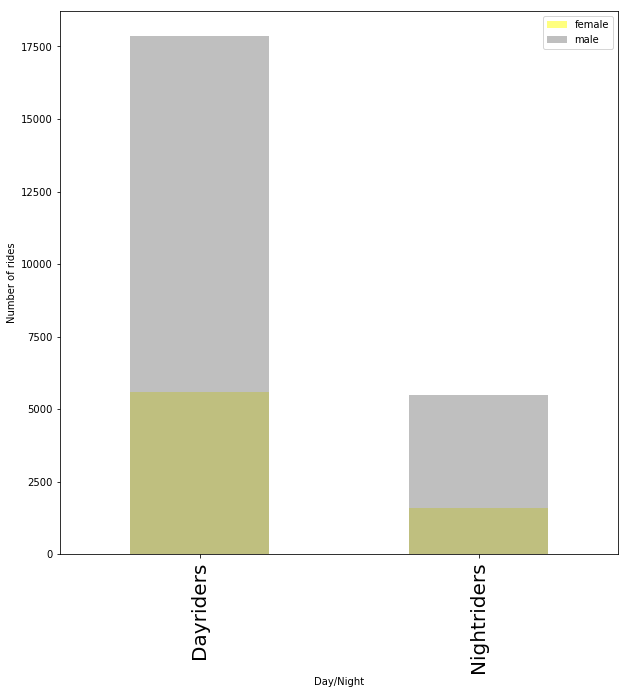

In [79]:
#https://github.com/fedhere/PUI2017_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb


%pylab inline

fig = pl.figure(figsize(10,10))

norm_w = 1
(df2['typee'][df2['gender'] == 2].groupby([df2.typee]).count()/ norm_w).plot(kind="bar",color='Yellow', alpha=0.5, label='female')

norm_m = 1
ax = (df2['typee'][df2['gender'] == 1].groupby([df2.typee]).count()/ norm_m).plot(kind="bar", color='Grey', alpha=0.5, label='male')
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day/Night")
ax.xaxis.set_ticklabels(['Dayriders','Nightriders'], fontsize=20)
pl.legend()

Populating the interactive namespace from numpy and matplotlib


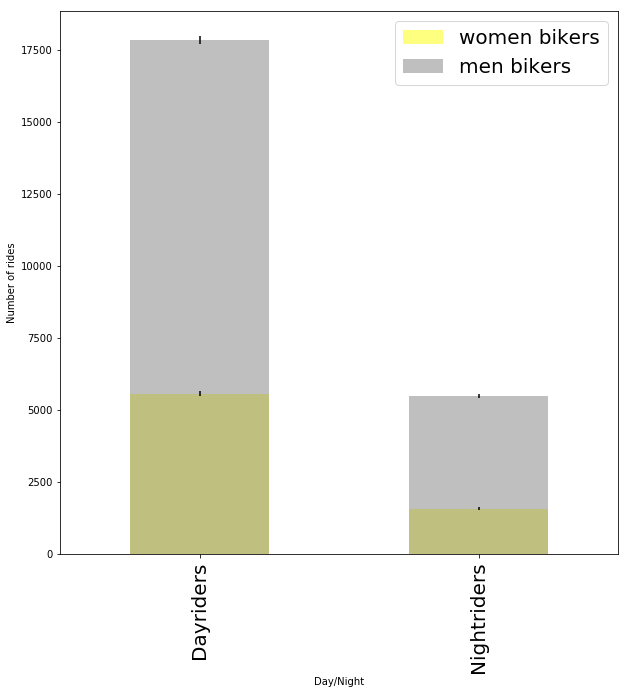

In [80]:
#https://github.com/fedhere/PUI2017_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb
%pylab inline
#absolute counts

fig=pl.figure(figsize(10,10))

counts_w = df2.typee[df2.gender == 2].groupby([df2.typee]).count()


norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='Yellow', alpha=0.5,  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df2.typee[df2.gender == 1].groupby([df2.typee]).count()

norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='Grey', label='men bikers')
ax.xaxis.set_ticklabels(['Dayriders','Nightriders'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day/Night")
pl.legend(['women bikers','men bikers'],fontsize=20)

Populating the interactive namespace from numpy and matplotlib


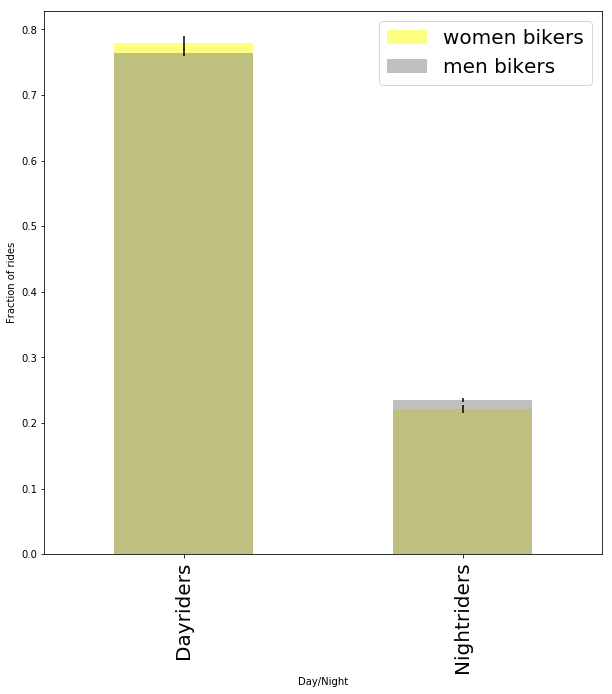

In [81]:
#https://github.com/fedhere/PUI2017_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb

%pylab inline

#absolute counts, with statistical errors #normalized

fig = pl.figure(figsize(10,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='Yellow',alpha=0.5,  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='Grey', label='men bikers')

ax.xaxis.set_ticklabels(['Dayriders','Nightriders'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day/Night")

pl.legend(['women bikers','men bikers'],fontsize=20)